In [1]:
import pandas as pd
import numpy as nd

In [2]:
df= pd.read_csv(r'data files\noisy_covid_data.csv')

In [3]:
print(df.head())

          Country      State  Confirmed  Deaths  Recovered        Date
0          Russia     Berlin     1486.0     NaN    50392.0  2022-05-07
1          France   New York    24762.0  2656.0    51021.0  2022-01-29
2  United Kingdom  Karnataka    27613.0  4875.0    18420.0  2021-07-20
3   United States    Florida     4196.0  2299.0    17202.0  2022-07-04
4          Russia     Moscow        NaN  3882.0     2394.0  2021-12-21


In [4]:
print(df.dtypes)

Country       object
State         object
Confirmed    float64
Deaths       float64
Recovered    float64
Date          object
dtype: object


In [5]:
print(df.describe())

           Confirmed       Deaths     Recovered
count     900.000000   900.000000    900.000000
mean    56043.782222  2490.523333  35400.577778
std     61621.220858  1429.540547  20600.337195
min      1002.000000    17.000000    536.000000
25%     25720.000000  1243.750000  17531.500000
50%     52682.000000  2524.500000  35093.000000
75%     77178.000000  3787.500000  54226.250000
max    865970.000000  4998.000000  69885.000000


In [6]:
print(df.info)

<bound method DataFrame.info of             Country        State  Confirmed  Deaths  Recovered        Date
0            Russia       Berlin     1486.0     NaN    50392.0  2022-05-07
1            France     New York    24762.0  2656.0    51021.0  2022-01-29
2    United Kingdom    Karnataka    27613.0  4875.0    18420.0  2021-07-20
3     United States      Florida     4196.0  2299.0    17202.0  2022-07-04
4            Russia       Moscow        NaN  3882.0     2394.0  2021-12-21
..              ...          ...        ...     ...        ...         ...
995   United States       Moscow    60372.0  3497.0     4800.0  2020-11-17
996           India  Maharashtra        NaN  3860.0     3838.0  2022-09-01
997         Germany   California    54863.0     NaN    63101.0  2020-03-06
998           India     New York    90941.0   900.0        NaN  2022-04-22
999          France  Maharashtra    39737.0  2075.0    36782.0  2021-07-10

[1000 rows x 6 columns]>


In [7]:
#Fill missing values with 0
df['Confirmed']=df['Confirmed'].fillna(0)

df['Deaths']=df['Deaths'].fillna(0)

df['Recovered']=df['Recovered'].fillna(0)
print(df.info)

<bound method DataFrame.info of             Country        State  Confirmed  Deaths  Recovered        Date
0            Russia       Berlin     1486.0     0.0    50392.0  2022-05-07
1            France     New York    24762.0  2656.0    51021.0  2022-01-29
2    United Kingdom    Karnataka    27613.0  4875.0    18420.0  2021-07-20
3     United States      Florida     4196.0  2299.0    17202.0  2022-07-04
4            Russia       Moscow        0.0  3882.0     2394.0  2021-12-21
..              ...          ...        ...     ...        ...         ...
995   United States       Moscow    60372.0  3497.0     4800.0  2020-11-17
996           India  Maharashtra        0.0  3860.0     3838.0  2022-09-01
997         Germany   California    54863.0     0.0    63101.0  2020-03-06
998           India     New York    90941.0   900.0        0.0  2022-04-22
999          France  Maharashtra    39737.0  2075.0    36782.0  2021-07-10

[1000 rows x 6 columns]>


In [8]:
df_clean = df[df['Confirmed'] <= 500000]

In [9]:
country_data= df.groupby('Country')[['Confirmed','Deaths','Recovered']].sum().reset_index()
print(country_data.head())

   Country  Confirmed    Deaths  Recovered
0   Brazil  5459110.0  222424.0  3367134.0
1   France  4765469.0  223333.0  2907060.0
2  Germany  4261936.0  210541.0  3172883.0
3    India  7464809.0  257437.0  3514596.0
4    Italy  4891820.0  270143.0  3055729.0


In [10]:
country_rank= country_data.sort_values(by='Confirmed',ascending=False).head(10)
print(country_rank)

          Country  Confirmed    Deaths  Recovered
3           India  7464809.0  257437.0  3514596.0
5          Mexico  5632946.0  259871.0  4112546.0
0          Brazil  5459110.0  222424.0  3367134.0
4           Italy  4891820.0  270143.0  3055729.0
8  United Kingdom  4808425.0  206574.0  3124525.0
1          France  4765469.0  223333.0  2907060.0
7           Spain  4614646.0  165317.0  2419315.0
6          Russia  4498728.0  200076.0  3267724.0
2         Germany  4261936.0  210541.0  3172883.0
9   United States  4041515.0  225755.0  2919008.0


In [11]:
country_data['Fatality_Rate']= country_data['Deaths'] / country_data['Confirmed']
print(country_data)

          Country  Confirmed    Deaths  Recovered  Fatality_Rate
0          Brazil  5459110.0  222424.0  3367134.0       0.040744
1          France  4765469.0  223333.0  2907060.0       0.046865
2         Germany  4261936.0  210541.0  3172883.0       0.049400
3           India  7464809.0  257437.0  3514596.0       0.034487
4           Italy  4891820.0  270143.0  3055729.0       0.055223
5          Mexico  5632946.0  259871.0  4112546.0       0.046134
6          Russia  4498728.0  200076.0  3267724.0       0.044474
7           Spain  4614646.0  165317.0  2419315.0       0.035824
8  United Kingdom  4808425.0  206574.0  3124525.0       0.042961
9   United States  4041515.0  225755.0  2919008.0       0.055859


In [12]:
#print(df.columns)
india_data = df[df['Country'] == 'India']

In [13]:
print(india_data)

    Country        State  Confirmed  Deaths  Recovered        Date
29    India        Texas    32113.0  1005.0    11344.0  2021-08-03
30    India       London    16401.0  1197.0    51955.0  2022-08-27
55    India     New York    88858.0  1084.0    49563.0  2021-09-28
60    India       Moscow    51617.0  2643.0        0.0  2022-03-27
66    India       Berlin    76271.0   510.0    19391.0  2021-02-05
..      ...          ...        ...     ...        ...         ...
972   India       Moscow    45458.0  4577.0    53300.0  2020-10-03
975   India    Karnataka    89743.0     0.0    64815.0  2020-04-24
986   India       London    75921.0  1990.0    15790.0  2022-09-08
996   India  Maharashtra        0.0  3860.0     3838.0  2022-09-01
998   India     New York    90941.0   900.0        0.0  2022-04-22

[110 rows x 6 columns]


In [14]:
india_daily = india_data.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [15]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


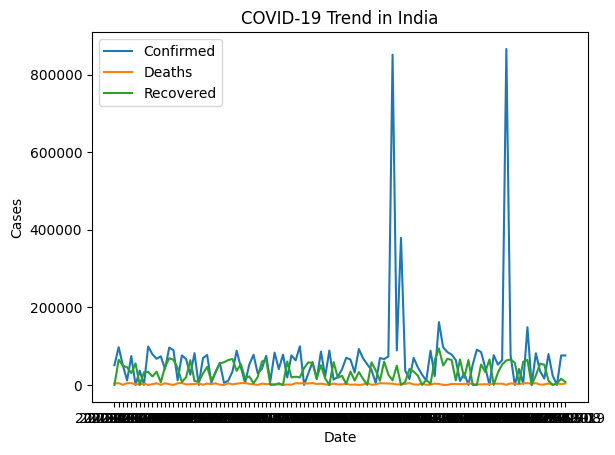

In [16]:
import matplotlib.pyplot as plt

# Plot the data
plt.plot(india_daily['Date'], india_daily['Confirmed'], label='Confirmed')
plt.plot(india_daily['Date'], india_daily['Deaths'], label='Deaths')
plt.plot(india_daily['Date'], india_daily['Recovered'], label='Recovered')

plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('COVID-19 Trend in India')
plt.legend()
plt.show()


In [17]:
df['Date'] = pd.to_datetime(df['Date'])
weekly_data = df.resample('W', on='Date').sum().reset_index()
print(weekly_data)

          Date                                            Country  \
0   2020-01-05  IndiaUnited KingdomFranceSpainFranceUnited Sta...   
1   2020-01-12  MexicoUnited StatesRussiaUnited KingdomUnited ...   
2   2020-01-19  RussiaMexicoGermanyUnited KingdomFranceUnited ...   
3   2020-01-26  ItalyUnited KingdomIndiaMexicoUnited KingdomSpain   
4   2020-02-02             FranceBrazilFranceItalyIndiaSpainItaly   
..         ...                                                ...   
139 2022-09-04     IndiaUnited StatesIndiaBrazilIndiaBrazilFrance   
140 2022-09-11                   ItalyBrazilIndiaRussiaItalySpain   
141 2022-09-18            FranceItalyFranceFranceItalySpainBrazil   
142 2022-09-25  RussiaIndiaItalyMexicoUnited StatesFranceMexic...   
143 2022-10-02                                 RussiaRussiaBrazil   

                                                 State  Confirmed   Deaths  \
0         MoscowNew YorkLondonTexasMoscowTexasNew York   322976.0  13901.0   
1    KarnatakaB

In [18]:
df['7-day Rolling Avg'] = df['Confirmed'].rolling(window=7).mean()

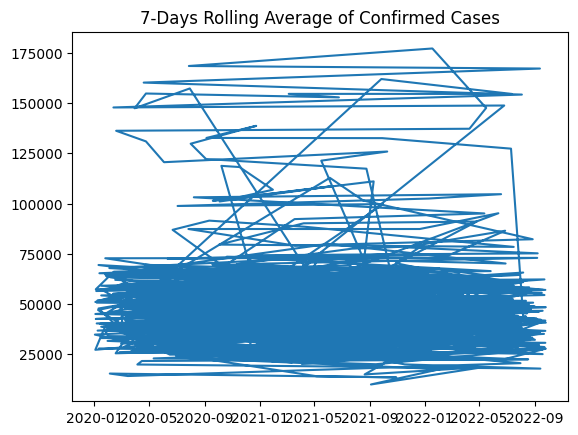

In [33]:
plt.plot(df['Date'], df['7-day Rolling Avg'], label='7-day Rolling Average')
plt.title('7-Days Rolling Average of Confirmed Cases')
plt.show()

In [20]:
population_data = pd.read_csv(r'data files\population_data.csv') 

In [21]:
print(population_data)

          Country  Population
0   United States   331002651
1           India  1380004385
2          Brazil   212559417
3          Russia   145934462
4          France    65273511
5  United Kingdom    67886011
6           Italy    60461826
7           Spain    46754778
8         Germany    83783942
9          Mexico   128932753


In [22]:
print(population_data.columns)

Index(['Country', 'Population'], dtype='object')


In [23]:
print(df.columns)

Index(['Country', 'State', 'Confirmed', 'Deaths', 'Recovered', 'Date',
       '7-day Rolling Avg'],
      dtype='object')


In [24]:
merged_data = pd.merge(df, population_data, left_on='Country', right_on='Country', how='left')

In [26]:
merged_data['Cases_per_Capita'] = merged_data['Confirmed'] / merged_data['Population']
print(merged_data)

            Country        State  Confirmed  Deaths  Recovered       Date  \
0            Russia       Berlin     1486.0     0.0    50392.0 2022-05-07   
1            France     New York    24762.0  2656.0    51021.0 2022-01-29   
2    United Kingdom    Karnataka    27613.0  4875.0    18420.0 2021-07-20   
3     United States      Florida     4196.0  2299.0    17202.0 2022-07-04   
4            Russia       Moscow        0.0  3882.0     2394.0 2021-12-21   
..              ...          ...        ...     ...        ...        ...   
995   United States       Moscow    60372.0  3497.0     4800.0 2020-11-17   
996           India  Maharashtra        0.0  3860.0     3838.0 2022-09-01   
997         Germany   California    54863.0     0.0    63101.0 2020-03-06   
998           India     New York    90941.0   900.0        0.0 2022-04-22   
999          France  Maharashtra    39737.0  2075.0    36782.0 2021-07-10   

     7-day Rolling Avg  Population  Cases_per_Capita  
0                  N

In [28]:
top_countries_per_capita = merged_data.sort_values(by='Cases_per_Capita', ascending=False).head(10)

In [29]:
print(top_countries_per_capita)

            Country       State  Confirmed  Deaths  Recovered       Date  \
499           Spain       Paris   658570.0  1244.0    31366.0 2022-05-17   
526           Italy  California   631750.0     0.0    48627.0 2021-08-25   
323  United Kingdom      Berlin   340120.0     0.0    58768.0 2020-06-22   
353          Mexico      Berlin   575650.0  3158.0     8984.0 2020-10-08   
762          Brazil      Moscow   481760.0  1907.0    35340.0 2022-06-13   
588           Spain      Berlin    99750.0  2548.0    14269.0 2020-01-25   
393           Spain    New York    99575.0   729.0    34793.0 2021-08-04   
310           Spain    New York    99120.0  1050.0    43984.0 2020-08-20   
582           Spain  California    98091.0  2734.0    65186.0 2021-04-26   
260           Spain       Texas    97494.0  1947.0    27860.0 2021-01-06   

     7-day Rolling Avg  Population  Cases_per_Capita  
499      147607.428571    46754778          0.014086  
526      117348.857143    60461826          0.010449 

In [32]:
print(top_countries_per_capita.columns)

Index(['Country', 'State', 'Confirmed', 'Deaths', 'Recovered', 'Date',
       '7-day Rolling Avg', 'Population', 'Cases_per_Capita'],
      dtype='object')


In [34]:
print(country_data.dtypes)

Country           object
Confirmed        float64
Deaths           float64
Recovered        float64
Fatality_Rate    float64
dtype: object


In [35]:
summary = country_data[['Country', 'Confirmed', 'Deaths', 'Recovered', 'Fatality_Rate']]

In [36]:
print(summary)

          Country  Confirmed    Deaths  Recovered  Fatality_Rate
0          Brazil  5459110.0  222424.0  3367134.0       0.040744
1          France  4765469.0  223333.0  2907060.0       0.046865
2         Germany  4261936.0  210541.0  3172883.0       0.049400
3           India  7464809.0  257437.0  3514596.0       0.034487
4           Italy  4891820.0  270143.0  3055729.0       0.055223
5          Mexico  5632946.0  259871.0  4112546.0       0.046134
6          Russia  4498728.0  200076.0  3267724.0       0.044474
7           Spain  4614646.0  165317.0  2419315.0       0.035824
8  United Kingdom  4808425.0  206574.0  3124525.0       0.042961
9   United States  4041515.0  225755.0  2919008.0       0.055859


In [37]:
summary.to_csv('naveen_kumar.csv')